# Este tutorial pareceu bem interessante
# O problema é que não consegui fazer a leitura do NMIST

# Softmax Tutorial

First we import the needed libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

Next we import the MNIST data files we are going to be classifying. This database contains images of thousands of handwritten digits, and their proper labels. For convenience I am using a script from Google, which can be download [here](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py). Just add it to your working directory, and it will download the MNIST database for you. We are going to use 500 training examples, and 100 test examples.

In [3]:
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
batch = mnist.train.next_batch(500)
tb = mnist.train.next_batch(100)

ImportError: No module named input_data

Let's take a look at one of the images in the set. Looks like a 4!

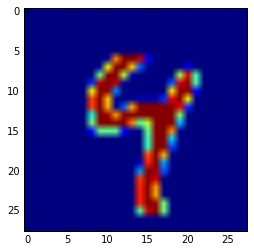

In [21]:
exampleNumber = 2 #Pick the example we want to visualize
example = batch[0][exampleNumber,:] #Then we load that example.
plt.imshow(np.reshape(example,[28,28])) #Next we reshape it to 28x28 and display it.

Now we set the loaded data as our x and y variables for both the train and test sets.

In [6]:
y = batch[1]
x = batch[0]
testY = tb[1]
testX = tb[0]

### Before we can get to training our model using the data, we will have to define a few functions that the training and testing process can use.

Here we define the loss function for softmax regression.

In [7]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

The below function converts integer class coding, where there is a unidimensional array of labels into a one-hot varient, where the array is size m (examples) x n (classes).

In [8]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

Here we perform the softmax transformation:
This allows us to get probabilities for each class score that s
um to 100%.


<img src="https://upload.wikimedia.org/math/0/9/9/0991837b7d5a522ebc156f51dadbed0e.png">

In [9]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

Here we determine the probabilities and predictions for each class when given a set of input data:

In [10]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

### This is the main loop of the softmax regression. 
Here we initialize our weights, regularization factor, number of iterations, and learning rate. We then loop over a computation of the loss and gradient, and application of gradient.

In [11]:
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print loss

323.250245594


We can look at how the loss (hopefully) decreases over time.

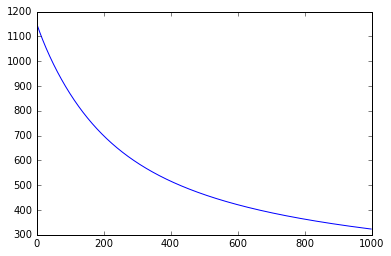

In [12]:
plt.plot(losses)

### Now that we have trained our model, we can see how well it is able to perform on both the training and test sets:

In [22]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [23]:
print 'Training Accuracy: ', getAccuracy(x,y)
print 'Test Accuracy: ', getAccuracy(testX,testY)

Training Accuracy:  0.902
Test Accuracy:  0.85


### One of the benefits of a simple model like softmax is that we can visualize the weights for each of the classes, and see what it prefers. Here we look at the weights for the '3' class.

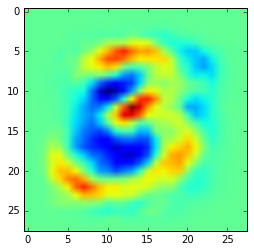

In [27]:
classWeightsToVisualize = 3
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))